In [1]:
# Customer Churn Analysis

In [2]:
# 1. Data Loading & Cleaning

## 1.1 Import Libraries

import pandas as pd

In [3]:
## 1.2 Load the Dataset

df = pd.read_excel("Telco_customer_churn.xlsx")

In [4]:
## 1.3 Preview the First Few Rows

df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [5]:
## 1.4 Inspect Dataset Structure

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [6]:
## 1.5 Drop Irrelevant Columns

cols_to_drop = [
    "CustomerID", "Country", "State", "City", "Zip Code", "Lat Long", 
    "Latitude", "Longitude", "Churn Reason"
]
df.drop(columns=cols_to_drop, inplace=True)

In [7]:
## 1.6 Convert Data Type

df["Total Charges"] = pd.to_numeric(df["Total Charges"], errors='coerce')

In [8]:
## 1.7 Drop Rows with Missing Columns

df = df.dropna()

In [9]:
## 1.8 Verify Shapes and Columns

print(df.shape)
print(df.dtypes)

(7032, 24)
Count                  int64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges        float64
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
dtype: object


In [10]:
# 2. Feature Engineering & Encoding

## 2.1 Label Encode Yes/No and Binary Columns

binary_cols = ["Gender", "Senior Citizen", "Partner", "Dependents", 
               "Phone Service", "Paperless Billing", "Churn Label"]

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'Female': 0, 'Male': 1})

In [11]:
## 2.2 One-Hot Encode Multi-Category Columns

df = pd.get_dummies(df, columns=[
    "Multiple Lines", "Internet Service", "Online Security", 
    "Online Backup", "Device Protection", "Tech Support", 
    "Streaming TV", "Streaming Movies", "Contract", "Payment Method"
], drop_first=True)

In [12]:
## 2.3 Define Features (X) and Target (y)

X = df.drop(["Churn Label", "Churn Value"], axis=1)
y = df["Churn Label"]

In [13]:
# 3. Train-Test Split & Model Setup

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [14]:
## 3.1 Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
## 3.2 Train-test split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [16]:
## 3.3 Logistic Regression Model Training

model = LogisticRegression(solver='saga', max_iter=5000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000, solver='saga')

In [17]:
## 3.4 Model Evaluation (Confusion Matrix, Accuracy, Classification Report)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[957  55]
 [ 62 333]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1012
           1       0.86      0.84      0.85       395

    accuracy                           0.92      1407
   macro avg       0.90      0.89      0.90      1407
weighted avg       0.92      0.92      0.92      1407

Accuracy: 0.9168443496801706


In [18]:
# 4. Model Explainability

## 4.1 Feature Importance with ELI5

import eli5
from eli5.sklearn import explain_weights

eli5.show_weights(model, feature_names=X.columns.tolist())

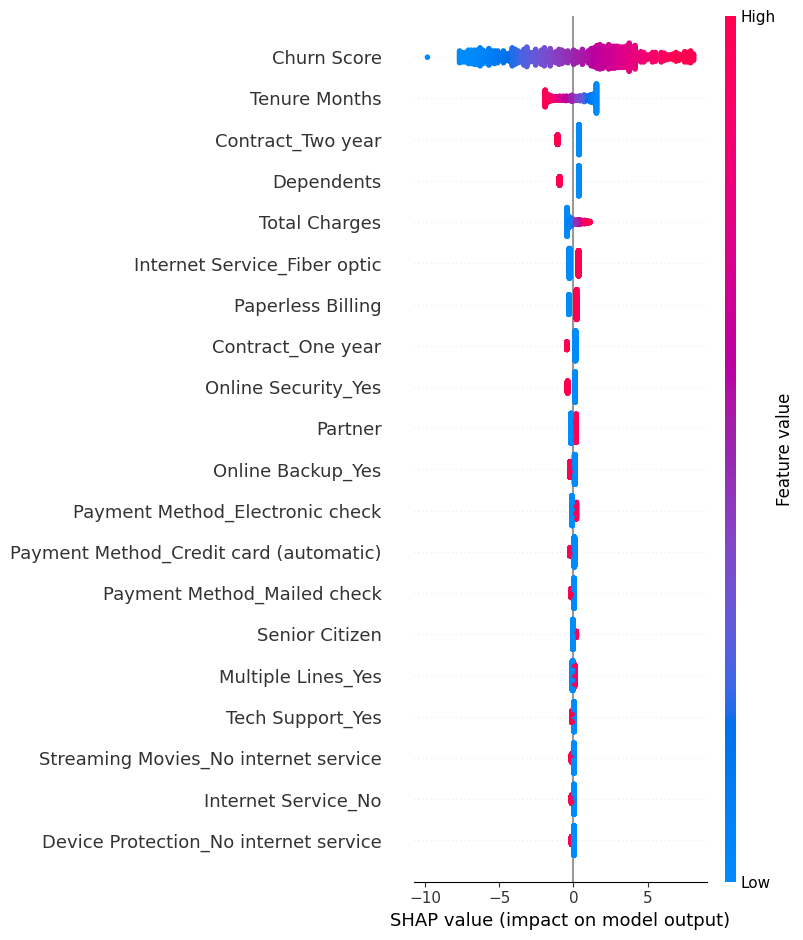

In [19]:
## 4.2 SHAP Summary Plot

import shap

### Create explainer and calculate SHAP values

explainer = shap.Explainer(model, X_train, feature_names=X.columns)
shap_values = explainer(X_test)

### Plot summary

shap.summary_plot(shap_values, X_test, feature_names=X.columns)

In [20]:
# 5. Customer Sgementation

def assign_segment(row):
    if row["Churn Label"] == 0:
        if row["Churn Score"] > 70 and row["Tenure Months"] < 12:
            return "At Risk"
        elif row["Churn Score"] < 30 and row["Tenure Months"] > 24:
            return "Loyal"
        elif 30 <= row["Churn Score"] <= 70 and row["Tenure Months"] < 6:
            return "Dormant"
        else:
            return "General"
    else:
        return "Churned"

## Apply the function

df["Segment"] = df.apply(assign_segment, axis=1)

## Check segment distribution

df["Segment"].value_counts()

Segment
General    4068
Churned    1869
Loyal       530
Dormant     414
At Risk     151
Name: count, dtype: int64

In [21]:
df.to_csv("churn_segmented.csv", index=False)